### Benchmark

Considering the binary outcomes, we choose a dummy classifier to obtain the benchmark.

### Load train and test data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 4

In [2]:
train_data = pd.read_csv('./data/train_data.csv', parse_dates=['date_act', 'date_ppl'])
test_data = pd.read_csv('./data/act_test.csv', parse_dates=['date'])
print train_data.shape, test_data.shape

(2153346, 55) (498687, 14)


In [3]:
test_data.dtypes

people_id                    object
activity_id                  object
date                 datetime64[ns]
activity_category            object
char_1                       object
char_2                       object
char_3                       object
char_4                       object
char_5                       object
char_6                       object
char_7                       object
char_8                       object
char_9                       object
char_10                      object
dtype: object

In [4]:
test_data.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


### remove prefix of test data

In [5]:
def remove_prefix(char):
    """Remove the 'type' prefix of 'char_*' and 'activity_category'
    """
    if char and str(char).startswith('type'):
        return char[5:]
    else:
        return

In [6]:
for col in test_data.columns[test_data.dtypes == 'object'] - ['people_id', 'activity_id']:
    print 'remove the prefix of feature: {}'.format(col)
    test_data[col] = test_data[col].apply(remove_prefix)
    print '======================================='

remove the prefix of feature: activity_category
remove the prefix of feature: char_1
remove the prefix of feature: char_10
remove the prefix of feature: char_2
remove the prefix of feature: char_3
remove the prefix of feature: char_4
remove the prefix of feature: char_5
remove the prefix of feature: char_6
remove the prefix of feature: char_7
remove the prefix of feature: char_8
remove the prefix of feature: char_9


### Fill na as '0' as we did in the train data

In [7]:
test_data.fillna(0, inplace=True)

In [8]:
pd.isnull(test_data).sum()

people_id            0
activity_id          0
date                 0
activity_category    0
char_1               0
char_2               0
char_3               0
char_4               0
char_5               0
char_6               0
char_7               0
char_8               0
char_9               0
char_10              0
dtype: int64

### Check the activity date in train and test data before splitting the dataset

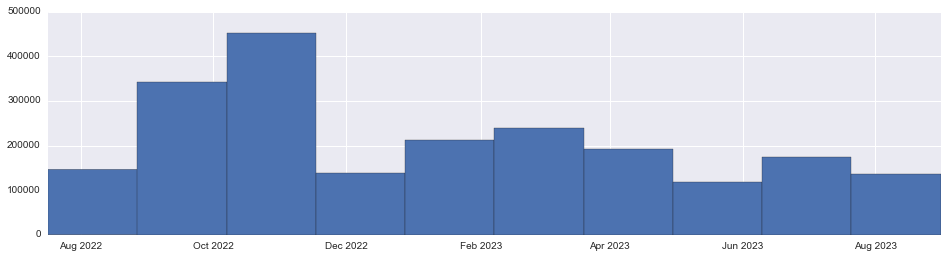

In [12]:
train_data.date_act.hist()

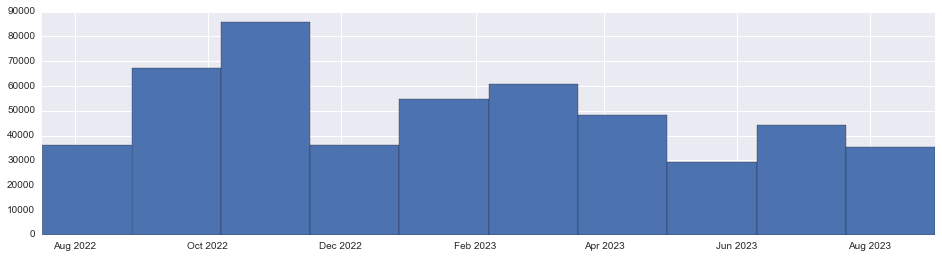

In [13]:
test_data.date.hist()

- The time series are similar for train and test data, so we don't need worry about time split of train data

### split the train data into train and validation sets

In [59]:
from sklearn.cross_validation import KFold
from sklearn.dummy import DummyClassifier
# from sklearn.metrics import roc_auc_score, roc_curve, auc

In [37]:
kf = KFold(n=train_data.shape[0], n_folds=5, shuffle=True, random_state=1234)

In [61]:
clf = DummyClassifier(strategy='most_frequent',random_state=1234)
for train_index, vali_index in kf:
    X_train, X_vali = train_data[['activity_category', 'char_38']].loc[train_index], train_data[['activity_category', 'char_38']].loc[vali_index]
#     print X_train.shape, X_vali.shape
    y_train, y_vali = train_data.outcome[train_index], train_data.outcome[vali_index]
#     print y_train.shape, y_vali.shape
    clf.fit(X_train, y_train)
    print 'The mean accuracy: {:.3f}'.format(clf.score(X_vali, y_vali))

The mean accuracy: 0.554
The mean accuracy: 0.556
The mean accuracy: 0.557
The mean accuracy: 0.556
The mean accuracy: 0.557


- The mean accuracy is around 0.56, it makes sense because 0 outcome accounts a little more for the total outcomes.

### In the following stage, we going to train a decison tree and a random forest to improve the performance

### write out the test data

In [62]:
test_data.to_csv('./data/test_data.csv', index=False)